Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.1952
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0709
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0189
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0232
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0140
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0162
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0150
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0095
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0113
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0092
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


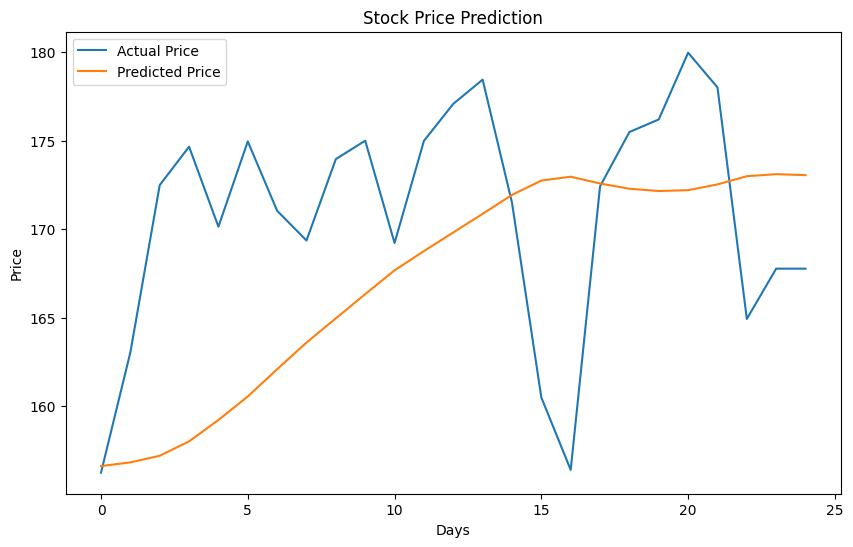

Day 15 → Current: 160.50, Predicted: 172.76 → Action: Buy
Day 16 → Current: 156.41, Predicted: 172.97 → Action: Buy
Day 17 → Current: 172.43, Predicted: 172.59 → Action: Hold
Day 18 → Current: 175.50, Predicted: 172.29 → Action: Sell
Day 19 → Current: 176.21, Predicted: 172.17 → Action: Sell
Day 20 → Current: 179.98, Predicted: 172.21 → Action: Sell
Day 21 → Current: 178.02, Predicted: 172.54 → Action: Sell
Day 22 → Current: 164.94, Predicted: 173.00 → Action: Buy
Day 23 → Current: 167.78, Predicted: 173.12 → Action: Buy
Day 24 → Current: 167.78, Predicted: 173.06 → Action: Buy


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Load stock data (You can use any CSV file with 'Date' and 'Close' columns)
df = pd.read_csv("/content/AAPL.csv")  # Example: Apple Inc. stock data
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences (e.g., use past 60 days to predict next day)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Reshape input for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# Decision Making: Buy / Sell / Hold
def get_action(current_price, predicted_price, threshold=0.01):
    change_percent = (predicted_price - current_price) / current_price
    if change_percent > threshold:
        return "Buy"
    elif change_percent < -threshold:
        return "Sell"
    else:
        return "Hold"

# Example: show last 10 decisions
for i in range(-10, 0):
    current = y_test_actual[i][0]
    predicted = y_pred[i][0]
    action = get_action(current, predicted)
    print(f"Day {i + len(y_test_actual)} → Current: {current:.2f}, Predicted: {predicted:.2f} → Action: {action}")


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Load stock data (You can use any CSV file with 'Date' and 'Close' columns)
df = pd.read_csv("/content/AAPL.csv")  # Example: Apple Inc. stock data
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

In [ ]:
# Create sequences (e.g., use past 60 days to predict next day)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

In [6]:
# Reshape input for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [7]:
# Split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.1246
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0355
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0319
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0252
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0123
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0189
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0187
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0116
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0090
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0099


In [10]:
# Predict
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step


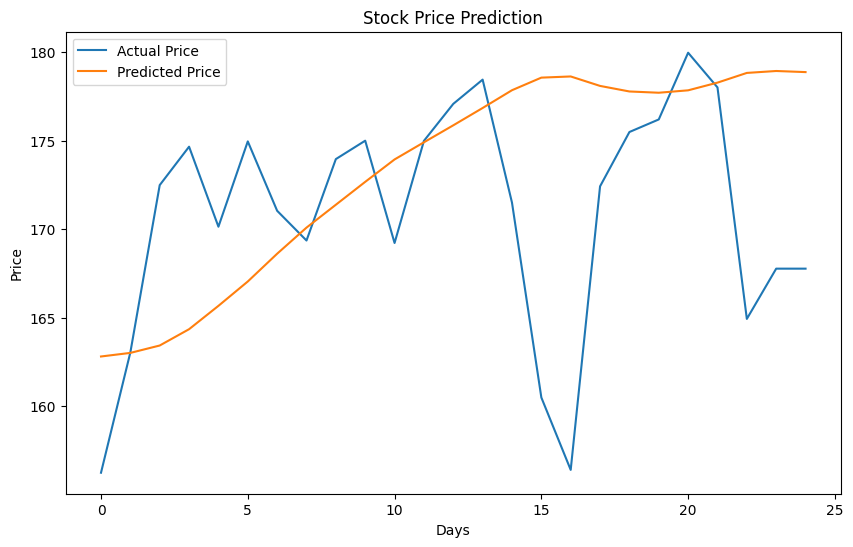

In [11]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
# Decision Making: Buy / Sell / Hold
def get_action(current_price, predicted_price, threshold=0.01):
    change_percent = (predicted_price - current_price) / current_price
    if change_percent > threshold:
        return "Buy"
    elif change_percent < -threshold:
        return "Sell"
    else:
        return "Hold"

In [13]:
# Example: show last 10 decisions
for i in range(-10, 0):
    current = y_test_actual[i][0]
    predicted = y_pred[i][0]
    action = get_action(current, predicted)
    print(f"Day {i + len(y_test_actual)} → Current: {current:.2f}, Predicted: {predicted:.2f} → Action: {action}")

Day 15 → Current: 160.50, Predicted: 178.57 → Action: Buy
Day 16 → Current: 156.41, Predicted: 178.64 → Action: Buy
Day 17 → Current: 172.43, Predicted: 178.10 → Action: Buy
Day 18 → Current: 175.50, Predicted: 177.79 → Action: Buy
Day 19 → Current: 176.21, Predicted: 177.72 → Action: Hold
Day 20 → Current: 179.98, Predicted: 177.86 → Action: Sell
Day 21 → Current: 178.02, Predicted: 178.29 → Action: Hold
Day 22 → Current: 164.94, Predicted: 178.84 → Action: Buy
Day 23 → Current: 167.78, Predicted: 178.95 → Action: Buy
Day 24 → Current: 167.78, Predicted: 178.89 → Action: Buy
